<a href="https://colab.research.google.com/github/TAKE-JP-17/Pytorch/blob/main/GMM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

兩個分佈的均值: [-0.44452182  0.04606674]
最佳分界閾值: -0.19922753657740255
   Band Value awei Count  binary_column
0      -0.703          3              0
1      -0.695        NaN              0
2      -0.688        NaN              0
3      -0.680        NaN              0
4      -0.672          1              0


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 38334 (\N{CJK UNIFIED IDEOGRAPH-95BE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20540 (\N{CJK UNIFIED IDEOGRAPH-503C}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


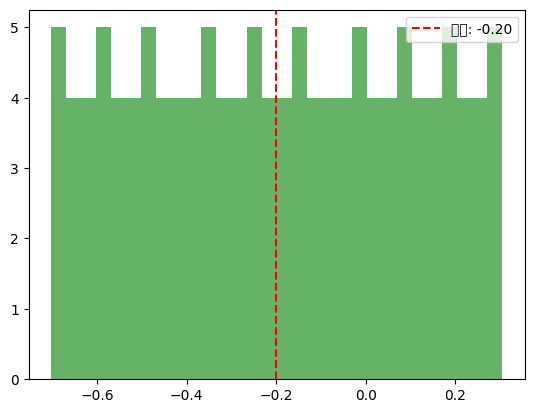

In [7]:
# Step 1: 安裝所需的套件
!pip install numpy pandas scikit-learn matplotlib

# Step 2: 載入所需的函式庫
import numpy as np
import pandas as pd
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt

# Step 3: 讀取 CSV 檔案
# 將 'your_file.csv' 替換成你的 CSV 檔案名稱，或是上傳檔案後取得路徑
data = pd.read_csv('/content/drive/MyDrive/SH.csv')

# 假設我們只對某一欄位進行 GMM 建模，請修改 'column_of_interest' 成你的欄位名稱
X = data[['Band Value']].values

# Step 4: 使用 Gaussian Mixture Model 進行建模
# 這裡設置 2 個成分，因為我們想找出二值化的閾值
gmm = GaussianMixture(n_components=2, covariance_type='full', random_state=42)
gmm.fit(X)

# Step 5: 找出兩個正態分佈的均值
means = gmm.means_.flatten()
print("兩個分佈的均值:", means)

# Step 6: 計算分界點（取兩個均值的中間值）
threshold = np.mean(means)
print("最佳分界閾值:", threshold)

# Step 7: 對資料進行二值化處理
binary_data = (X > threshold).astype(int)

# 新增二值化後的資料至原 DataFrame
data['binary_column'] = binary_data

# Step 8: 顯示結果
print(data.head())

# Step 9: 視覺化顯示
plt.hist(X, bins=30, alpha=0.6, color='g')
plt.axvline(threshold, color='r', linestyle='--', label=f'閾值: {threshold:.2f}')
plt.legend()
plt.show()
